In [33]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("dark")

In [34]:
with open("evaluation_results.json") as json_data:
    data = json.load(json_data)
    json_data.close()

In [67]:
data[3]["Success Rate"]

0.12

In [46]:
data[1]["Path Length"]

[None,
 None,
 None,
 1197.3341091899574,
 1066.5882240932347,
 899.8340185422998,
 None,
 None,
 1257.4960833846221,
 None,
 1285.2402565125626,
 1297.5632470510336,
 1000.6130918141878,
 734.731528065959,
 1890.933317317317,
 509.74710230540586,
 192.49886140795846,
 871.9136411362131,
 737.3047389529497,
 894.2570673315716,
 224.90478234271743,
 1246.530641986318,
 391.1102361397287,
 165.5796489759877,
 1166.1829332802592,
 None,
 369.4161247157494,
 None,
 1414.69924537823,
 235.56354071525294,
 727.930907539242,
 608.6488820390048,
 170.11013112610885,
 1031.1028466564217,
 1226.6706792721452,
 644.993564465769,
 None,
 None,
 None,
 419.63296101892837,
 None,
 443.2879157793053,
 538.6684293720622,
 1218.0398116173155,
 873.7091820844159,
 657.9288924625773,
 1211.0884917348028,
 1213.7320502123425,
 255.56747665717086,
 None]

In [80]:
import pandas as pd

srrt_lengths = data[1]["Path Length"]
rrt_edge_lengths = data[2]["Path Length"]

combined_df = pd.DataFrame({'srrt_lengths': srrt_lengths, 'rrt_edge_lengths': rrt_edge_lengths})


In [77]:
filtered_df = combined_df.dropna()
filtered_df

,srrt_lengths,rrt_edge_lengths
3,1197.334109,1985.222655
4,1066.588224,1059.926894
5,899.834019,956.289334
8,1257.496083,1265.883150
10,1285.240257,1306.774719
11,1297.563247,1243.509042
13,734.731528,1890.347458
14,1890.933317,1270.458030
15,509.747102,576.468662
16,192.498861,212.126531


In [72]:
mean_srrt_lengths = filtered_df['srrt_lengths'].mean()
median_srrt_lengths = filtered_df['srrt_lengths'].median()
mean_rrt_edge_lengths = filtered_df['rrt_edge_lengths'].mean()
median_rrt_edge_lengths = filtered_df['rrt_edge_lengths'].median()

In [109]:
mean_srrt_lengths

811.7859709734506

In [108]:
median_srrt_lengths

804.6091900445814

In [107]:
mean_rrt_edge_lengths

917.1526817999802

In [105]:
median_rrt_edge_lengths

973.2562443720512

In [86]:
df_melted = filtered_df.melt(value_vars=['srrt_lengths', 'rrt_edge_lengths'], 
                             var_name='Type', value_name='Lengths')

df_melted


,Type,Lengths
0,srrt_lengths,1197.334109
1,srrt_lengths,1066.588224
2,srrt_lengths,899.834019
3,srrt_lengths,1257.496083
4,srrt_lengths,1285.240257
...,...,...
63,rrt_edge_lengths,1090.485756
64,rrt_edge_lengths,666.384263
65,rrt_edge_lengths,1487.241630
66,rrt_edge_lengths,1348.624585


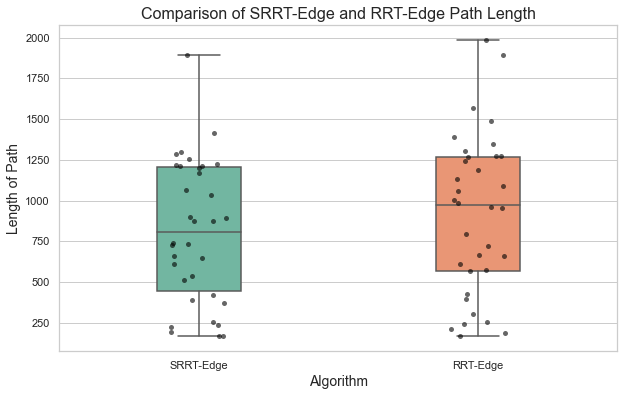

In [102]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Type', y='Lengths', data=df_melted, palette="Set2", width=0.3)
stripplot = sns.stripplot(x='Type', y='Lengths', data=df_melted, jitter=True, color='black', alpha=0.6)

boxplot.set_xticklabels(["SRRT-Edge", "RRT-Edge"])
plt.title('Comparison of SRRT-Edge and RRT-Edge Path Length', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Length of Path', fontsize=14)

plt.show()